### Drawing a network diagram of the _C. elegans_ connectome (Witvliet et al., _Nature_ 2021).
---
*Last updated: 21 July 2023*

In [1]:
# imports
import os
import torch

from utils import ROOT_DIR
from torch_geometric.data import Data
from visualize._utils import draw_connectome

CUDA device found.
	 GPU: NVIDIA A100 80GB PCIe


Attributes: 
 <bound method BaseData.keys of Data(
  x=[300, 512],
  edge_index=[2, 4392],
  edge_attr=[4392, 2],
  y=[300],
  pos={
    0=[2],
    1=[2],
    2=[2],
    3=[2],
    4=[2],
    5=[2],
    6=[2],
    7=[2],
    8=[2],
    9=[2],
    10=[2],
    11=[2],
    12=[2],
    13=[2],
    14=[2],
    15=[2],
    16=[2],
    17=[2],
    18=[2],
    19=[2],
    20=[2],
    21=[2],
    22=[2],
    23=[2],
    24=[2],
    25=[2],
    26=[2],
    27=[2],
    28=[2],
    29=[2],
    30=[2],
    31=[2],
    32=[2],
    33=[2],
    34=[2],
    35=[2],
    36=[2],
    37=[2],
    38=[2],
    39=[2],
    40=[2],
    41=[2],
    42=[2],
    43=[2],
    44=[2],
    45=[2],
    46=[2],
    47=[2],
    48=[2],
    49=[2],
    50=[2],
    51=[2],
    52=[2],
    53=[2],
    54=[2],
    55=[2],
    56=[2],
    57=[2],
    58=[2],
    59=[2],
    60=[2],
    61=[2],
    62=[2],
    63=[2],
    64=[2],
    65=[2],
    66=[2],
    67=[2],
    68=[2],
    69=[2],
    70=[2],
    71=[2],
    72=[2],
 

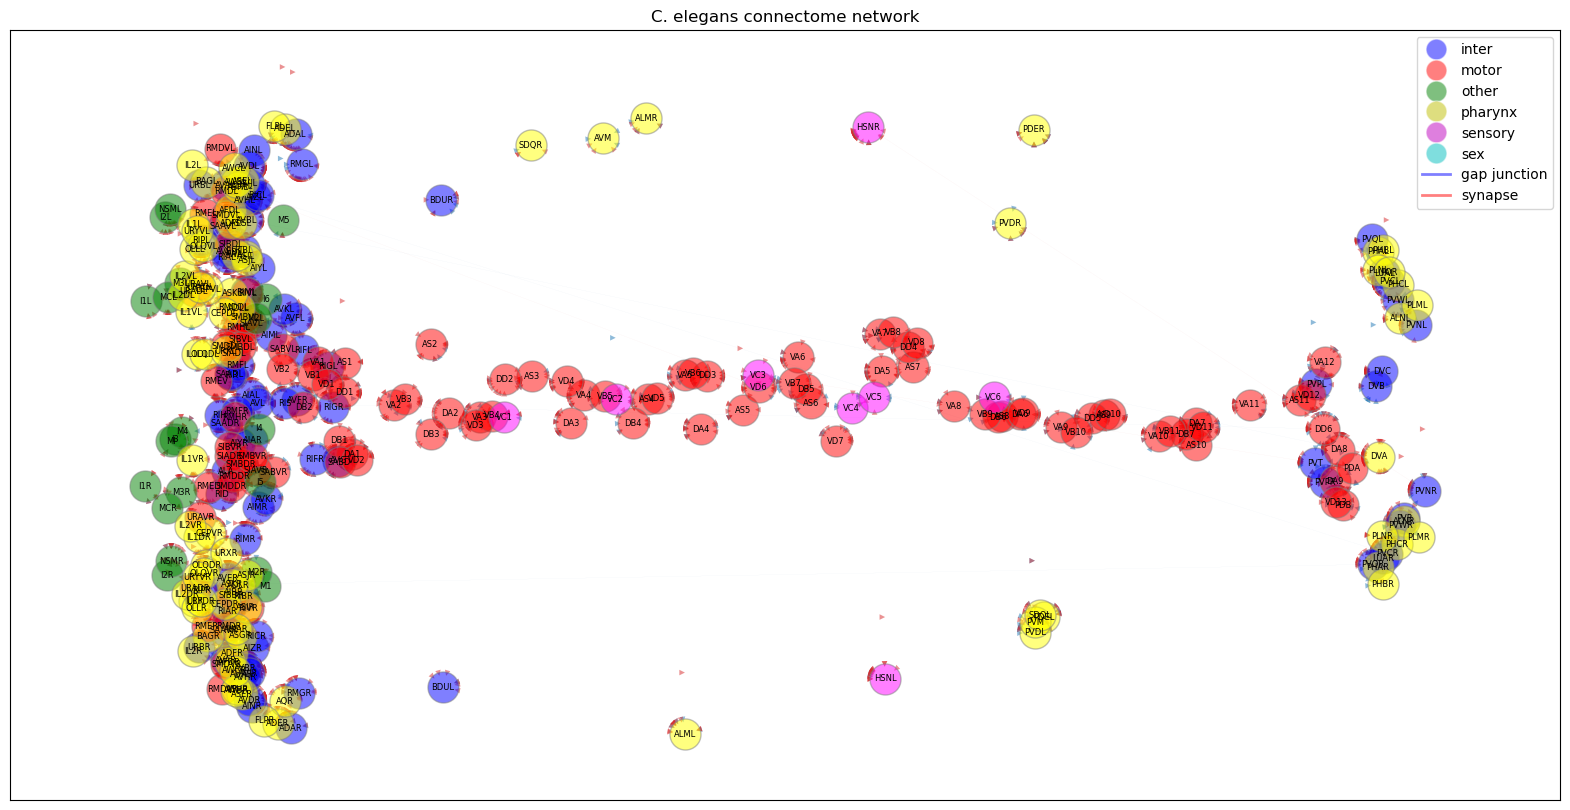

In [2]:
# load the raw data
graph_tensors = torch.load(
    os.path.join(ROOT_DIR, "data", "processed", "connectome", "graph_tensors.pt")
)

# make the graph
graph = Data(**graph_tensors)

# investigate the graph
print(
    "Attributes:",
    "\n",
    graph.keys,
    "\n",
    f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, "
    f"Num. node features {graph.num_node_features}",
    end="\n",
)
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}")

# draw the connectome
# draw_connectome(graph)
draw_connectome(graph, pos=None, labels=None, plt_title="C. elegans connectome network", plot_3d=True)